### Pretend that we have the following 2D data, where there is a single predictor (feature/independent variable) 
### and of course a target (response/dependent variable)

In [1]:
import numpy as np

In [2]:
feature_x = np.linspace(-1, 1, 101)
target_y = (2 * feature_x) + (np.random.randn(*feature_x.shape) * 0.25)

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

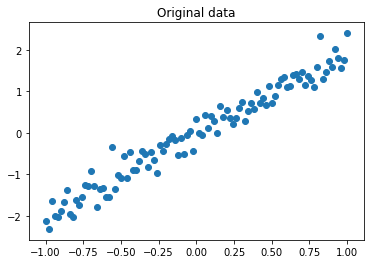

In [4]:
plt.figure(1)
plt.title("Original data")
plt.scatter(feature_x,target_y)

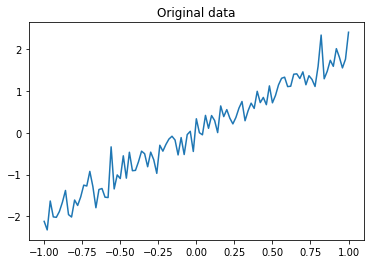

In [5]:
plt.figure(2)
plt.title("Original data")
plt.plot(feature_x,target_y)

##  Use Tensorflow

In [6]:
import tensorflow as tf

/Users/nikhilkatukuri/Desktop/anaconda/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


###  We suspect linearity, so we try using a linear learning model,
###  namely,   Y  =  wX.
###  w is the only parameter of the model, to learn from the data.

In [7]:
def model(X, w):
    return tf.multiply(X, w)

###   The following are hyper-parameters, set in advance.

In [8]:
learning_rate = 0.01
epochs = 100

###  TensorFlow API  requires
###     1.  Placeholders for inputs
###     2.  Variables for parameters to learn
###     3.  Cost (loss) function
###     4.  Minimizer method for the cost

...

## Inputs to model

In [9]:
X = tf.placeholder("float")
target = tf.placeholder("float")

## Model parameter to learn

In [10]:
w = tf.Variable(0.0, name="weights")

##  Cost (loss) function, attached to an actual model

In [11]:
model_output = model(X, w)

# square mean error

cost = tf.reduce_mean(tf.square(target - model_output))

## Minimizer for the above cost

In [12]:
minimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


## Must execute within a session object.
## First, initialize global variables.

In [13]:
# initializer
init = tf.global_variables_initializer()

# run initializer
sess = tf.Session()
sess.run(init)

##  Do training

In [14]:
%%time

for epoch in range(epochs):
    
    for (x, y) in zip(feature_x, target_y):
        
        sess.run(minimizer, feed_dict={X: x, target: y})

CPU times: user 4.67 s, sys: 848 ms, total: 5.52 s
Wall time: 3.47 s


##  Value of the learned parameter w

In [15]:
w

<tf.Variable 'weights:0' shape=() dtype=float32_ref>

In [16]:
learned_w = sess.run(w)

In [17]:
print(learned_w)

1.9696537


##  Usually, you need to close the session.

In [18]:
sess.close()

##   Show the regression line over the original data

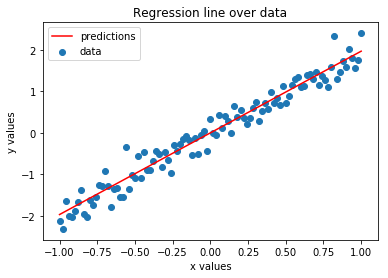

In [19]:
plt.figure(3)
plt.title("Regression line over data")

plt.xlabel("x values")
plt.ylabel("y values")

# original data
plt.scatter(feature_x,target_y,label="data")

#  predicted y values
predictions = feature_x * learned_w

#  regression line 
plt.plot(feature_x, predictions, 'r', label="predictions")
plt.legend()
plt.show()